<a href="https://colab.research.google.com/github/lavanyalaguduva/learn_nn/blob/main/forward_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip uninstall nnfs
# !pip install nnfs
!pip uninstall numpy -y
# !pip install "numpy<2.0.0"
!pip install numpy

Found existing installation: nnfs 0.5.1
Uninstalling nnfs-0.5.1:
  Would remove:
    /usr/local/bin/nnfs
    /usr/local/lib/python3.12/dist-packages/nnfs-0.5.1.dist-info/*
    /usr/local/lib/python3.12/dist-packages/nnfs/*
    /usr/local/lib/python3.12/dist-packages/nnfs_video_tutorial_code/*
Proceed (Y/n)? Y
  Successfully uninstalled nnfs-0.5.1
Found existing installation: numpy 2.3.3
Uninstalling numpy-2.3.3:
  Successfully uninstalled numpy-2.3.3
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2

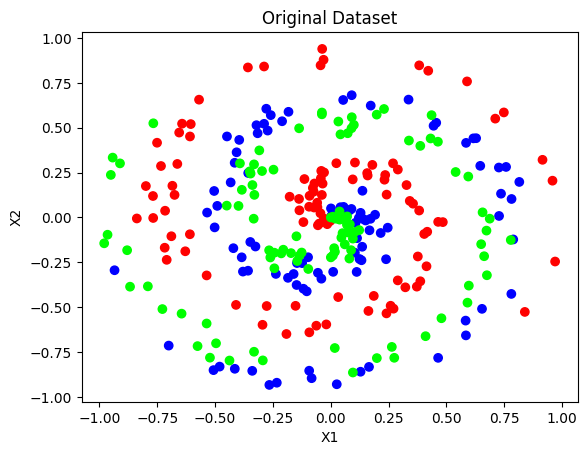

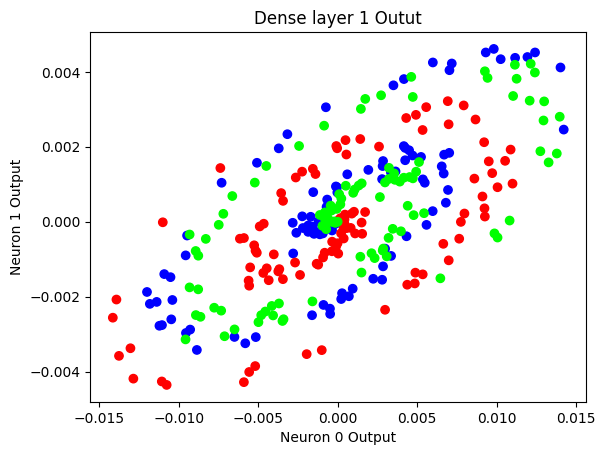

In [ ]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
nnfs.init()

class Dense_Layer:
  def __init__(self, n_inputs, n_neurons):
    # np.random.randn(...) → generates random numbers from a standard normal distribution (mean = 0, std = 1).
    # Multiplying by 0.01 → scales down the values so weights are very small, roughly in range (-0.01, 0.01).
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    # Fill bias array with zeroes for each neuron
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title("Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
# Create dense layer
dense_1 = Dense_Layer(2,3)
dense_1.forward(X)
plt.scatter(dense_1.output[:, 0], dense_1.output[:, 2], c=y, cmap='brg')
plt.title("Dense layer 1 Outut")
plt.xlabel("Neuron 0 Output")
plt.ylabel("Neuron 1 Output")
plt.show()

# plt.figure(figsize=(6,5))
# dense_2=Dense_Layer(3,3)
# dense_2.forward(dense_1.output)
# plt.scatter(dense_2.output[:, 0], dense_2.output[:, 2], c=y, cmap='brg')
# plt.title("Dense layer 2 Outut")
# plt.xlabel("Neuron 0 Output")
# plt.ylabel("Neuron 1 Output")
# plt.show()




<div class="alert alert-block alert-success">
<b>ACTIVATION FUNCTION: RELU</b>
</div>

In [ ]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0,inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [ ]:
class Activation_RELU:
  def forward(self, inputs):
    inputs = np.array(inputs,dtype=np.float32)
    # Calculate output values from input
    self.output = np.maximum(0,inputs)

In [ ]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create dense layer
dense1=Dense_Layer(2,3)
# Forward pass to dense layer
dense1.forward(X)
print(dense1.output[:5])
# forward pass to RELU layer
activation1 = Activation_RELU()
activation1.forward(dense1.output)

print(activation1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


<div class="alert alert-block alert-success">
<b>ACTIVATION FUNCTION: SOFTMAX</b>
</div>

In [ ]:
# numpy exercises
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8,9]])
print(np.sum(A))

B = np.array([[1, 2, 3], [4, 5, 6], [7, 8,9]])
print(np.add(A,B))

print(np.sum(A, axis=0))#column wise addition
print(np.sum(A, axis=0).shape)

print(np.sum(A, axis=1))#column wise addition
print(np.sum(A, axis=1).shape)

print(np.sum(A, axis=0, keepdims=True))#column wise addition
print(np.sum(A, axis=0, keepdims=True).shape)

print(np.sum(A, axis=1, keepdims=True))#column wise addition
print(np.sum(A, axis=1, keepdims=True).shape)

print(np.max(A, axis=0))#column wise max
print(np.max(A, axis=1))#row wise max


45
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[12 15 18]
(3,)
[ 6 15 24]
(3,)
[[12 15 18]]
(1, 3)
[[ 6]
 [15]
 [24]]
(3, 1)
[7 8 9]
[3 6 9]


In [ ]:
# Softmax python implementation

import numpy as np
inputs = [[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]]

# Find max from columns and minus from each element
# find exponent of each element
exp_values = np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
# apply softmax
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(probabilities)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


In [ ]:
#  Softmax activation
class Activation_Softmax:
  def forward(self, inputs):
    inputs = np.array(inputs,dtype=np.float32)
    exp_values = np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
    self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)


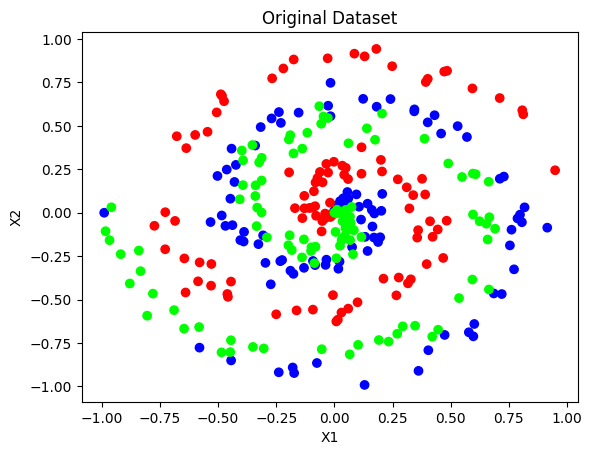

dense1.output:[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.16260984e-04 -1.25047403e-04 -1.44372728e-04]
 [-1.06729902e-04  6.56755223e-05 -2.36120326e-05]
 [-3.06084641e-04 -1.83667513e-04 -2.92247959e-04]
 [-4.55963793e-04 -4.11522432e-04 -5.18594002e-04]]
activation1.output:[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 6.567552e-05 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
dense2.output:[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.33568386e-06 -4.61817256e-08 -7.87243642e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
activation2.output:[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333305 0.3333335  0.3333335 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


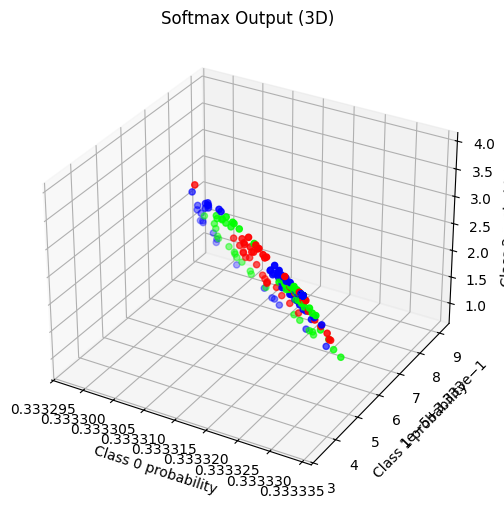

In [5]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Apply RELU, Softmax to forward pass
# Create dataset
X, y = spiral_data(samples=100, classes=3)
X = np.asarray(X, dtype=np.float32).copy()
y = np.asarray(y, dtype=np.int32).copy()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title("Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
# Create dense layer 1
dense1 = Dense_Layer(2,3)
dense1.forward(X)
print(f'dense1.output:{dense1.output[:5]}')
# forward to Relu
activation1 = Activation_RELU()
activation1.forward(dense1.output)
print(f'activation1.output:{activation1.output[:5]}')
# Create dense layer 2
dense2 = Dense_Layer(3,3)
dense2.forward(activation1.output)
print(f'dense2.output:{dense2.output[:5]}')
# forward to softmax
activation2 = Activation_Softmax()
activation2.forward(dense2.output)
print(f'activation2.output:{activation2.output[:5]}')

# ###### this is giving 'memoryview' object has no attribute 'astype'. - it was because of nnfs
# So tried with uninstalling nnfs and it works

# Plot the output
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    activation2.output[:,0],
    activation2.output[:,1],
    activation2.output[:,2],
    c=y, cmap='brg'
)

ax.set_xlabel("Class 0 probability")
ax.set_ylabel("Class 1 probability")
ax.set_zlabel("Class 2 probability")
plt.title("Softmax Output (3D)")
plt.show()


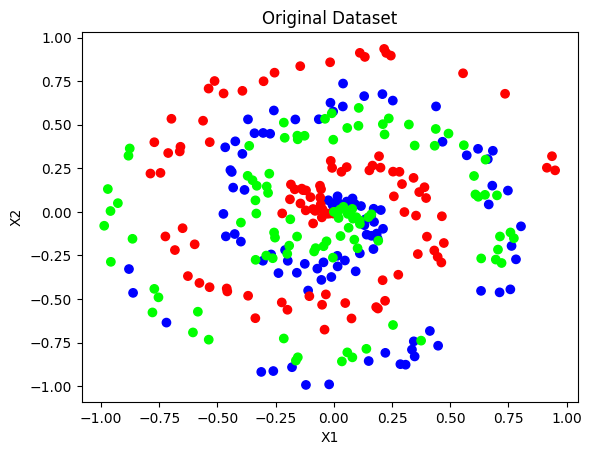

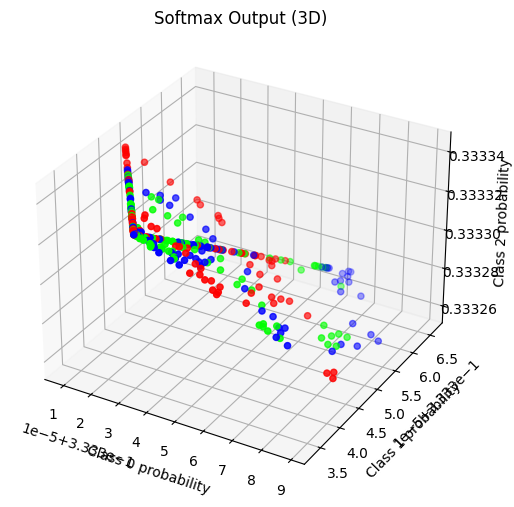

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# ---------------------------
# Neural Network Layer Classes
# ---------------------------
class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_RELU:
    def forward(self, inputs):
        inputs = np.array(inputs, dtype=np.float32)
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        inputs = np.array(inputs, dtype=np.float32)
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2), dtype=np.float32)
    y = np.zeros(samples*classes, dtype=np.int32)
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y
# ---------------------------
# Set reproducible seed
# ---------------------------
# np.random.seed(0)

# ---------------------------
# Generate Dataset
# ---------------------------
X, y = spiral_data(samples=100, classes=3)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)

# Plot Original Dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title("Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# ---------------------------
# Forward Pass
# ---------------------------
dense1 = Dense_Layer(2, 3)
dense1.forward(X)

activation1 = Activation_RELU()
activation1.forward(dense1.output)

dense2 = Dense_Layer(3, 3)
dense2.forward(activation1.output)

activation2 = Activation_Softmax()
activation2.forward(dense2.output)

# ---------------------------
# 3D Plot of Softmax Output
# ---------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    activation2.output[:,0],
    activation2.output[:,1],
    activation2.output[:,2],
    c=y, cmap='brg'
)

ax.set_xlabel("Class 0 probability")
ax.set_ylabel("Class 1 probability")
ax.set_zlabel("Class 2 probability")
plt.title("Softmax Output (3D)")
plt.show()